This project has a large file size 

Follow these instructions to use LFS on Github
- git lfs install
- git lfs track 'data/yelp-reviews.csv'
- git add .gitattributes
- git add data/yelp-reviews.csv
- git commit -m 'Track large file with Git LFS'
- git push origin main 

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Load data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)

    return df
file_path ='data/yelp-reviews.csv'
df = load_data(file_path)
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


In [3]:
# EDA 
def perform_eda(df):
    missing_values = df.isna().sum()
    print
    return df
perform_eda(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150374 entries, 0 to 150373
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150374 non-null  object
 1   review_id    150374 non-null  object
 2   date         150374 non-null  object
 3   text         150374 non-null  object
 4   stars        150374 non-null  int64 
 5   language     150374 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.9+ MB


In [4]:
# Summary statistics
statistics = df.describe().T
statistics

,count,mean,std,min,25%,50%,75%,max
stars,150374.0,4.006045,1.415824,1.0,3.0,5.0,5.0,5.0


### **Data Visualization**

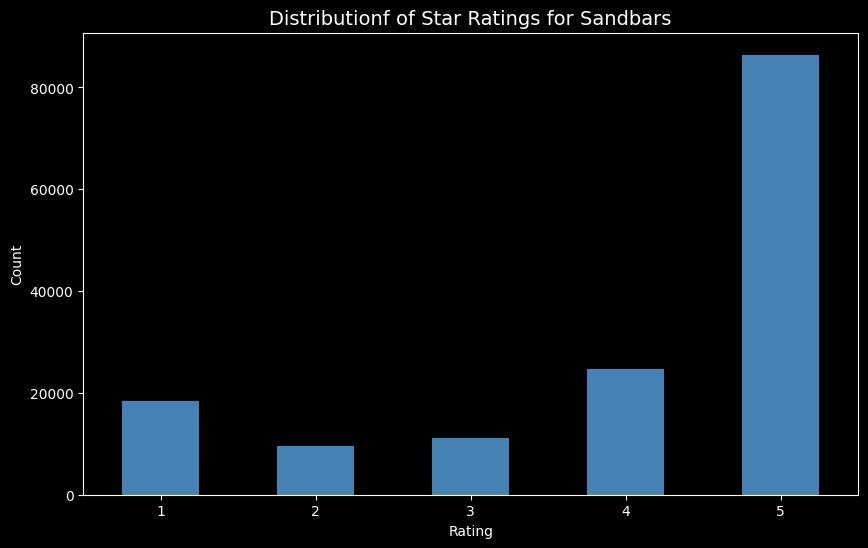

In [5]:
# Dark mode
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
df['stars'].value_counts().sort_index().plot(kind='bar', color='steelblue')

plt.title('Distributionf of Star Ratings for Sandbars', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **Data Preprocessing**

In [6]:
import re

# Cleant text data
def clean_data(df, text_column):

    # Remove missing values
    df = df.dropna(subset=[text_column,'stars'])

    # Normalize text data
    df[text_column] = df[text_column].str.lower()   

    # Remove punctuation and special characters
    df[text_column] = df[text_column].apply(lambda x:re.sub(r'[^A-Za-z\s]', '', x))

    return df

df = clean_data(df, text_column='text')
df.head()



,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en


In [7]:
# Check for Nan/missing values in the text column
missing_text = df['text'].isna().sum()
print(f'Number of missing text values: {missing_text}')


Number of missing text values: 0


### **Feature Engineering**

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')

# Instantialize the stopwords object
stop_words = set(stopwords.words('english'))

# Preprocess text => tokens, remove stopwords and join tokens
def preprocess_text_to_tokens(text):

    # Tokenize text and filter stopwords
    filtered_tokens= [
        word for word in word_tokenize(text.lower()) if word not in stop_words
    ]

    # Join the tokens into a string
    return ' '.join(filtered_tokens)

# Create a tokens column and apply preprocessing to the text column and store results in a tokens column
df['tokens']= df['text'].apply(preprocess_text_to_tokens)

# Check transformation
df[['text','tokens']].head() # return only text and tokens columns

[nltk_data] Downloading package punkt_tab to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,tokens
0,lynn and montecito flowers are simply the best...,lynn montecito flowers simply best awesome cho...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Instantialize the stopwords object
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text => lemmas, remove stopwords and join lemmmas
def preprocess_text_to_lemmas(text):

    # Lemmatize text and filter stopwords
    lemmas = [
        lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stop_words
    ]

    # Join the tokens into a string
    return ' '.join(lemmas)

# Create a lemmas column and apply preprocessing to the text column and store results in a lemmas column
df['lemmas']= df['text'].apply(preprocess_text_to_lemmas)

# Check transformation
df[['text','lemmas']].head() # return only text and lemmas columns

,text,lemmas
0,lynn and montecito flowers are simply the best...,lynn montecito flower simply best awesome choi...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [10]:
# Display transformed dataframe
df.head()

,business_id,review_id,date,text,stars,language,tokens,lemmas
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en,lynn montecito flowers simply best awesome cho...,lynn montecito flower simply best awesome choi...
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en,love place always loved food truly due killer ...,love place always loved food truly due killer ...
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en,stayed last weekend dog motel style inside fou...,stayed last weekend dog motel style inside fou...
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en,came quick bite got thai salad bowl white bean...,came quick bite got thai salad bowl white bean...
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en,finally able try lunch holdrens husband ordere...,finally able try lunch holdrens husband ordere...


### **Time Series Preprocessing**
 - Create a resampled dataset for time series analysis
 


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert dates to datetime
def convert_to_datetime(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') #Convert date column into datetime, and handle errors

    return df

# Set the date as the index
def set_date_as_index(df, date_column):
    df.set_index(date_column, inplace=True)

    return df

# Resample the data by monthly intervals 
def resample_data(df , interval='ME'): # M - monthly, D- daily, W for weekly
    df_resampled = df.resample(interval).mean()

    return df_resampled

In [12]:
# # Convert date to date time 
# df = convert_to_datetime(df, date_column='date')
# df = set_date_as_index(df, date_column='date')

# # Resample data to monthly 
# df_resampled =  resample_data(df, interval='ME')

# # Display resampled dataframe
# df_resampled.head()

In [13]:
# Reset index if 'date' is currently an index and not a column
df.reset_index(inplace=True)

# Then you can apply your original function to convert 'date' column to datetime
df = convert_to_datetime(df, date_column='date')

# After conversion, set 'date' back as the index
df = set_date_as_index(df, date_column='date')

def resample_numeric_data(df, interval='M'):
    # Select only numeric columns for resampling
    numeric_df = df.select_dtypes(include='number')
    df_resampled = numeric_df.resample(interval).mean()
    return df_resampled

# Check if 'date' is already set as index
if 'date' in df.columns:
    df = set_date_as_index(df, date_column='date')

# Resample numeric data only
df_resampled = resample_numeric_data(df, interval='M')

# Check resampled data
df_resampled.head()

C:\Users\User 1\AppData\Local\Temp\ipykernel_20300\2098222764.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = numeric_df.resample(interval).mean()


,index,stars
date,,
2015-01-31,1348.0,3.936967
2015-02-28,3965.0,3.932598
2015-03-31,6596.5,3.923698
2015-04-30,9346.0,3.962856
2015-05-31,12285.5,3.933677


In [14]:
# Save the dataframe 
output_path =  'data/reviews_processed_tsa.csv'
df_resampled.to_csv(output_path)
print(f'Processed dataframe saved to {output_path}')

Processed dataframe saved to data/reviews_processed_tsa.csv


In [15]:
# Load cleaned dataframe
df_resampled = pd.read_csv('data/reviews_processed_tsa.csv', keep_default_na=False)

# Check for missing values
missing_values = df_resampled.isna().sum()
print(f'Number of missing values : {missing_values}')

Number of missing values : date     0
index    0
stars    0
dtype: int64


### **Time Series Analysis**


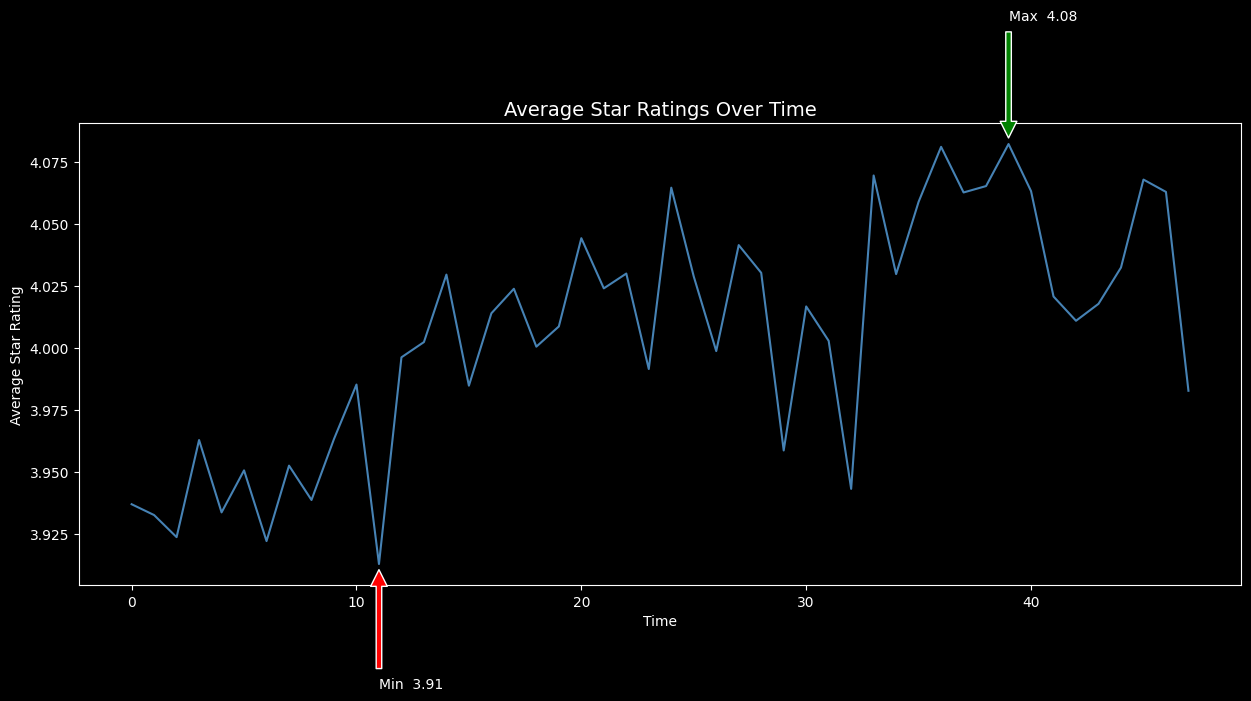

In [16]:
import matplotlib.pyplot as plt

# Annotating the highest and lowest points
max_value = df_resampled['stars'].max()
min_value = df_resampled['stars'].min()
max_date = df_resampled['stars'].idxmax()
min_date = df_resampled['stars'].idxmin()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], color ='steelblue')
plt.title('Average Star Ratings Over Time' , fontsize=14)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')


plt.annotate(f'Max {max_value: .2f}',
             xy=(max_date, max_value),
             xytext=(max_date, max_value + 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05),)
             

plt.annotate(f'Min {min_value: .2f}',
             xy=(min_date, min_value),
             xytext=(min_date, min_value + - 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))
             

plt.show()

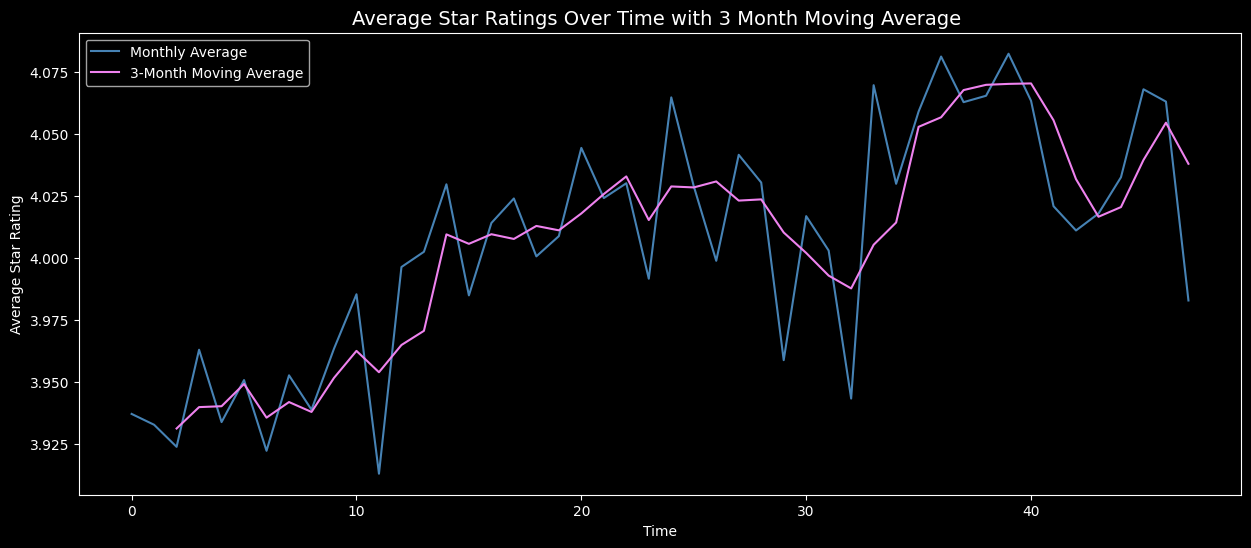

In [17]:
# Calculate 3 month-moving average
df_resampled['3-month-MA'] = df_resampled['stars'].rolling(window=3).mean()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], color ='steelblue', label = 'Monthly Average')
plt.plot(df_resampled.index, df_resampled['3-month-MA'], color ='violet', label = '3-Month Moving Average')
plt.title('Average Star Ratings Over Time with 3 Month Moving Average ' , fontsize=14)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')
plt.legend(loc='best')
plt.show()

### **Deep Learning**

- Data Preparation

In [18]:
import numpy as np 
from sklearn.model_selection import train_test_split

# Create sequences from the time series data
def create_sequences(data, sequence_length):

    sequences = []
    targets = []

    # Loop
    for start_index in range(len(data) - sequence_length):

        end_index = start_index + sequence_length
        sequence = data[start_index:end_index]
        target = data[end_index]

        sequences.append(sequence)
        targets.append(target)


    return np.array(sequences), np.array(targets)

# Sequence length 3 for quarterly, 6 is semi-annual , 12 is for annual
sequence_length = 3 # for 3 months or quarterly

X, y = create_sequences(df_resampled['stars'].values, sequence_length)

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


#### LSTM Model (Long Short-Term Memory) Deep Learning Model

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model(input_shape, units_first_layer, units_second_layer, dropout_first, dropout_second):

    # Initialize model
    model = Sequential()

    # Add 1st layer with dropout 
    model.add(LSTM(units=units_first_layer, return_sequences=True , input_shape=input_shape)) 
    model.add(Dropout(dropout_first))

    # Add second layer with dropout 
    model.add(LSTM(units= units_second_layer, return_sequences=False))
    model.add(Dropout(dropout_second))

    # Add output layer
    model.add(Dense(units=1))

    return model

# Compile the model
def compile_model(model, optimizer, loss):
    model.compile(optimizer=optimizer, loss=loss)

    return model


In [20]:
# Define input shape 
input_shape = (X_train.shape[1], 1)

# Build the model
model = build_lstm_model(input_shape, units_first_layer=100, units_second_layer=50, dropout_first=0.5, dropout_second=0.2)

# Compile the model
model = compile_model(model, optimizer='adam', loss='mean_squared_error')


c:\Users\User 1\AppData\Local\pypoetry\Cache\virtualenvs\src-2k3mSSDP-py3.12\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
from tqdm.keras import TqdmCallback

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[TqdmCallback(verbose=1 )]
)

c:\Users\User 1\AppData\Local\pypoetry\Cache\virtualenvs\src-2k3mSSDP-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 16.1231

  1%|          | 1/100 [00:03<05:36,  3.40s/epoch, loss=16.1, val_loss=15.8]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 16.1231 - val_loss: 15.8327


Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 15.4888 - val_loss: 15.0478


Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.8909

  3%|▎         | 3/100 [00:03<01:30,  1.07epoch/s, loss=14.9, val_loss=14.3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 14.8909 - val_loss: 14.2791


Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 13.9366 - val_loss: 13.5159


Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.2707

  5%|▌         | 5/100 [00:03<00:46,  2.04epoch/s, loss=13.3, val_loss=12.8]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 13.2707 - val_loss: 12.7521


Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 12.4982 - val_loss: 11.9807


Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.8403

  7%|▋         | 7/100 [00:03<00:29,  3.15epoch/s, loss=11.8, val_loss=11.2]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 11.8403 - val_loss: 11.1983


Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.6849 - val_loss: 10.3983


Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.0378

  9%|▉         | 9/100 [00:03<00:20,  4.47epoch/s, loss=10, val_loss=9.58]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 10.0378 - val_loss: 9.5777


Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 9.4628 - val_loss: 8.7370


Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.7355

 11%|█         | 11/100 [00:04<00:15,  5.87epoch/s, loss=8.74, val_loss=7.88]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 8.7355 - val_loss: 7.8755


Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 7.9181 - val_loss: 6.9950


Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.1648

 13%|█▎        | 13/100 [00:04<00:12,  6.84epoch/s, loss=7.16, val_loss=6.1] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 7.1648 - val_loss: 6.1021


Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 5.7576 - val_loss: 5.2052


Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.0793

 15%|█▌        | 15/100 [00:04<00:10,  7.74epoch/s, loss=5.08, val_loss=4.32]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 5.0793 - val_loss: 4.3170


Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 4.4228 - val_loss: 3.4541


Epoch 17/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.8736

 17%|█▋        | 17/100 [00:04<00:09,  8.88epoch/s, loss=3.87, val_loss=2.64]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 3.8736 - val_loss: 2.6365


Epoch 18/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 2.9411 - val_loss: 1.8883


Epoch 19/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.2202

 19%|█▉        | 19/100 [00:04<00:08, 10.00epoch/s, loss=2.22, val_loss=1.23]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.2202 - val_loss: 1.2344


Epoch 20/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1.6330 - val_loss: 0.6996


Epoch 21/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9857

 21%|██        | 21/100 [00:04<00:07, 10.55epoch/s, loss=0.986, val_loss=0.308]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.9857 - val_loss: 0.3080


Epoch 22/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4481 - val_loss: 0.0747


Epoch 23/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2176

 23%|██▎       | 23/100 [00:05<00:06, 11.66epoch/s, loss=0.218, val_loss=0.0012]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2176 - val_loss: 0.0012


Epoch 24/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1574 - val_loss: 0.0708


Epoch 25/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2237

 25%|██▌       | 25/100 [00:05<00:06, 12.37epoch/s, loss=0.224, val_loss=0.245] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2237 - val_loss: 0.2454


Epoch 26/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2311 - val_loss: 0.4766


Epoch 27/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4709

 27%|██▋       | 27/100 [00:05<00:05, 12.72epoch/s, loss=0.471, val_loss=0.699]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.4709 - val_loss: 0.6987


Epoch 28/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7865 - val_loss: 0.8615


Epoch 29/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9761

 29%|██▉       | 29/100 [00:05<00:05, 13.34epoch/s, loss=0.976, val_loss=0.934]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.9761 - val_loss: 0.9336


Epoch 30/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.8112 - val_loss: 0.9329


Epoch 31/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.2662

 31%|███       | 31/100 [00:05<00:05, 13.70epoch/s, loss=1.27, val_loss=0.852] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.2662 - val_loss: 0.8519


Epoch 32/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.9356 - val_loss: 0.7237


Epoch 33/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7058

 33%|███▎      | 33/100 [00:05<00:04, 14.07epoch/s, loss=0.706, val_loss=0.576]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7058 - val_loss: 0.5762


Epoch 34/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.4173 - val_loss: 0.4369


Epoch 35/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5376

 35%|███▌      | 35/100 [00:05<00:04, 13.31epoch/s, loss=0.538, val_loss=0.309]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.5376 - val_loss: 0.3086


Epoch 36/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.3580 - val_loss: 0.1986


Epoch 37/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3249

 37%|███▋      | 37/100 [00:06<00:04, 13.67epoch/s, loss=0.325, val_loss=0.113]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3249 - val_loss: 0.1133


Epoch 38/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1286 - val_loss: 0.0560


Epoch 39/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1774

 39%|███▉      | 39/100 [00:06<00:04, 13.74epoch/s, loss=0.177, val_loss=0.0211]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1774 - val_loss: 0.0211


Epoch 40/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1648 - val_loss: 0.0042


Epoch 41/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1363

 41%|████      | 41/100 [00:06<00:04, 13.64epoch/s, loss=0.136, val_loss=0.00186]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1363 - val_loss: 0.0019


Epoch 42/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1773 - val_loss: 0.0096


Epoch 43/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2477

 43%|████▎     | 43/100 [00:06<00:04, 13.74epoch/s, loss=0.248, val_loss=0.0236] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2477 - val_loss: 0.0236


Epoch 44/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2214 - val_loss: 0.0396


Epoch 45/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2228

 45%|████▌     | 45/100 [00:06<00:03, 13.88epoch/s, loss=0.223, val_loss=0.0543]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2228 - val_loss: 0.0543


Epoch 46/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1453 - val_loss: 0.0674


Epoch 47/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1836

 47%|████▋     | 47/100 [00:06<00:03, 13.96epoch/s, loss=0.184, val_loss=0.0771]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1836 - val_loss: 0.0771


Epoch 48/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1561 - val_loss: 0.0828


Epoch 49/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1747

 49%|████▉     | 49/100 [00:06<00:03, 13.99epoch/s, loss=0.175, val_loss=0.0843]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1747 - val_loss: 0.0843


Epoch 50/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.2452 - val_loss: 0.0813


Epoch 51/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2815

 51%|█████     | 51/100 [00:07<00:03, 13.30epoch/s, loss=0.281, val_loss=0.0734]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2815 - val_loss: 0.0734


Epoch 52/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1735 - val_loss: 0.0628


Epoch 53/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2635

 53%|█████▎    | 53/100 [00:07<00:03, 13.42epoch/s, loss=0.263, val_loss=0.0493]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2635 - val_loss: 0.0493


Epoch 54/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2136 - val_loss: 0.0352


Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1472

 55%|█████▌    | 55/100 [00:07<00:03, 13.75epoch/s, loss=0.147, val_loss=0.0229]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1472 - val_loss: 0.0229


Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2161 - val_loss: 0.0122


Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1256

 57%|█████▋    | 57/100 [00:07<00:03, 13.93epoch/s, loss=0.126, val_loss=0.00531]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1256 - val_loss: 0.0053


Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2701 - val_loss: 0.0017


Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1282

 59%|█████▉    | 59/100 [00:07<00:02, 14.06epoch/s, loss=0.128, val_loss=0.00155]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1282 - val_loss: 0.0015


Epoch 60/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1230 - val_loss: 0.0036


Epoch 61/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1607

 61%|██████    | 61/100 [00:07<00:02, 14.08epoch/s, loss=0.161, val_loss=0.00659]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1607 - val_loss: 0.0066


Epoch 62/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1748 - val_loss: 0.0105


Epoch 63/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1397

 63%|██████▎   | 63/100 [00:07<00:02, 14.00epoch/s, loss=0.14, val_loss=0.0141]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1397 - val_loss: 0.0141


Epoch 64/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1951 - val_loss: 0.0159


Epoch 65/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1212

 65%|██████▌   | 65/100 [00:08<00:02, 14.08epoch/s, loss=0.121, val_loss=0.0168]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1212 - val_loss: 0.0168


Epoch 66/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1248 - val_loss: 0.0164


Epoch 67/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1457

 67%|██████▋   | 67/100 [00:08<00:02, 12.79epoch/s, loss=0.146, val_loss=0.0155]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1457 - val_loss: 0.0155


Epoch 68/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1945 - val_loss: 0.0128


Epoch 69/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1416

 69%|██████▉   | 69/100 [00:08<00:02, 12.71epoch/s, loss=0.142, val_loss=0.0094]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1416 - val_loss: 0.0094


Epoch 70/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1719 - val_loss: 0.0068


Epoch 71/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1980

 71%|███████   | 71/100 [00:08<00:02, 13.00epoch/s, loss=0.198, val_loss=0.00459]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1980 - val_loss: 0.0046


Epoch 72/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1519 - val_loss: 0.0031


Epoch 73/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1110

 73%|███████▎  | 73/100 [00:08<00:02, 12.77epoch/s, loss=0.111, val_loss=0.00218]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1110 - val_loss: 0.0022


Epoch 74/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1891 - val_loss: 0.0016


Epoch 75/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1201

 75%|███████▌  | 75/100 [00:08<00:01, 13.03epoch/s, loss=0.12, val_loss=0.00136] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1201 - val_loss: 0.0014


Epoch 76/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0739 - val_loss: 0.0013


Epoch 77/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1937

 77%|███████▋  | 77/100 [00:09<00:01, 13.17epoch/s, loss=0.194, val_loss=0.00132]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1937 - val_loss: 0.0013


Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1123 - val_loss: 0.0014


Epoch 79/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1289

 79%|███████▉  | 79/100 [00:09<00:01, 11.28epoch/s, loss=0.129, val_loss=0.00151]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.1289 - val_loss: 0.0015


Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.1664 - val_loss: 0.0014


Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2353

 81%|████████  | 81/100 [00:09<00:01, 11.52epoch/s, loss=0.235, val_loss=0.00135]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2353 - val_loss: 0.0014


Epoch 82/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1469 - val_loss: 0.0013


Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0967

 83%|████████▎ | 83/100 [00:09<00:01, 11.61epoch/s, loss=0.0967, val_loss=0.00131]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0967 - val_loss: 0.0013


Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1912 - val_loss: 0.0013


Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1982

 85%|████████▌ | 85/100 [00:09<00:01, 11.97epoch/s, loss=0.198, val_loss=0.00134] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1982 - val_loss: 0.0013


Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1525 - val_loss: 0.0014


Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1779

 87%|████████▋ | 87/100 [00:09<00:01, 12.30epoch/s, loss=0.178, val_loss=0.00159]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1779 - val_loss: 0.0016


Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0553 - val_loss: 0.0020


Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1202

 89%|████████▉ | 89/100 [00:10<00:00, 12.43epoch/s, loss=0.12, val_loss=0.00254] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1202 - val_loss: 0.0025


Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1657 - val_loss: 0.0031


Epoch 91/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1564

 91%|█████████ | 91/100 [00:10<00:00, 11.63epoch/s, loss=0.156, val_loss=0.00367]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1564 - val_loss: 0.0037


Epoch 92/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2274 - val_loss: 0.0041


Epoch 93/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1146

 93%|█████████▎| 93/100 [00:10<00:00, 12.16epoch/s, loss=0.115, val_loss=0.00398]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1146 - val_loss: 0.0040


Epoch 94/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1502 - val_loss: 0.0037


Epoch 95/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1377

 95%|█████████▌| 95/100 [00:10<00:00, 12.41epoch/s, loss=0.138, val_loss=0.00369]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1377 - val_loss: 0.0037


Epoch 96/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1982 - val_loss: 0.0039


Epoch 97/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1112

 97%|█████████▋| 97/100 [00:10<00:00, 12.77epoch/s, loss=0.111, val_loss=0.00373]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1112 - val_loss: 0.0037


Epoch 98/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1688 - val_loss: 0.0039


Epoch 99/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1338

 99%|█████████▉| 99/100 [00:10<00:00, 13.19epoch/s, loss=0.134, val_loss=0.00411]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1338 - val_loss: 0.0041


Epoch 100/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1383 - val_loss: 0.0040


100%|██████████| 100/100 [00:10<00:00,  9.12epoch/s, loss=0.138, val_loss=0.00404]


#### Model Evaluation

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss : {test_loss}')

    return test_loss

def calculate_metrics(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f'Mean Squared Error : {mse}')
    print(f'Mean Absolute Error : {mae}')

    return mse, mae

def predict_and_evaluate(model, X_test, y_test):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f'Mean Squared Error : {mse}')
    print(f'Mean Absolute Error : {mae}')

    return mse, mae

def predict_and_evaluate(model, X_test, y_test):

    # Evaluate model
    test_loss = evaluate_model(model, X_test, y_test)
    predictions = model.predict(X_test)

    #Calculate metrics
    mse, mae = calculate_metrics(y_test, predictions)

    return  predictions , mse, mae

predictions , mse, mae = predict_and_evaluate(model, X_test, y_test)
    

   


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0056
Test Loss : 0.0055810012854635715
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Mean Squared Error : 0.005580989788319704
Mean Absolute Error : 0.06689533528891342


LSTM Model Performance 


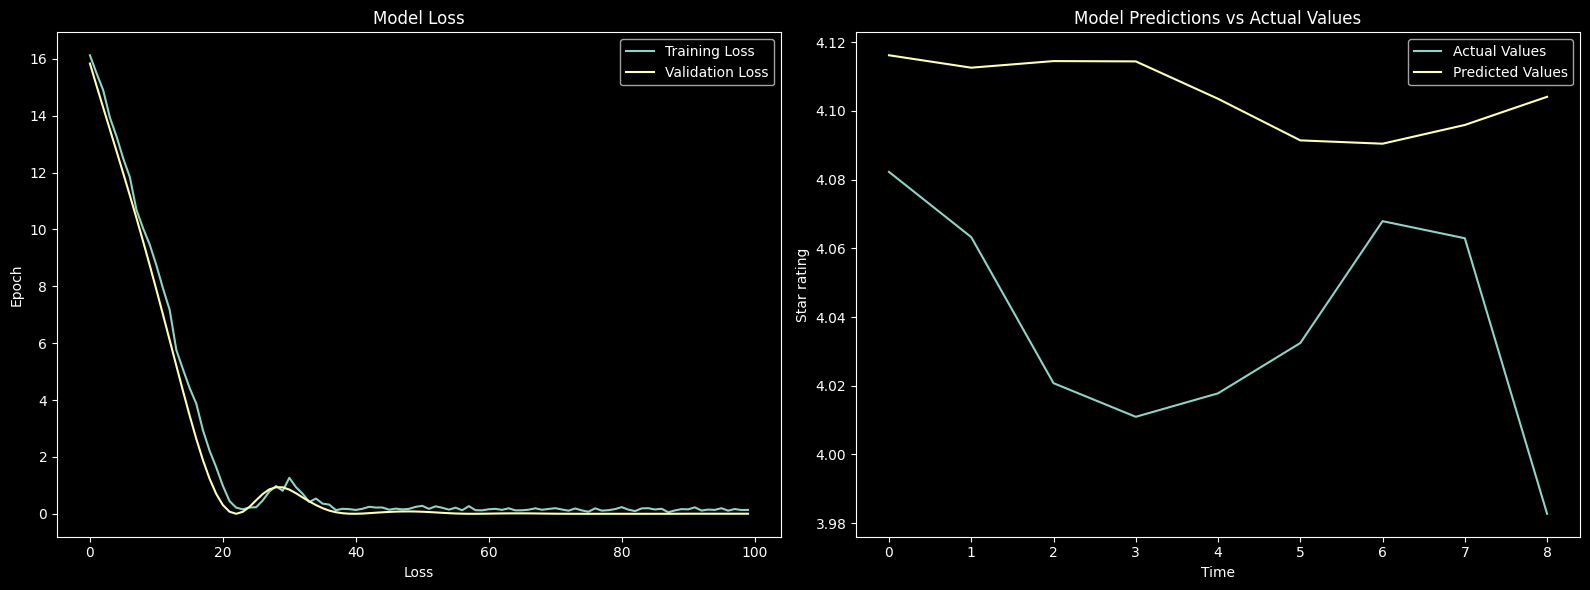

In [23]:
import matplotlib.pyplot as plt

def plot_training_and_predictions(history, y_test, predictions):

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Training and validation loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Loss')
    axes[0].set_ylabel('Epoch')
    axes[0].legend()

    # Predictions
    axes[1].plot(y_test,  label='Actual Values')
    axes[1].plot(predictions,  label='Predicted Values')
    axes[1].set_title('Model Predictions vs Actual Values')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Star rating')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

print('LSTM Model Performance ')
plot_training_and_predictions(history, y_test, predictions)

In [26]:
# Save model 
model.save('models/lstm_model.h5')

#### **Vader**


In [32]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Intialize the VADER object
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to the text data
def apply_vader(text):
    
    return analyzer.polarity_scores(text)

# Create vader_scores and vader_compound column
df['vader_scores'] = df['text'].apply(apply_vader)
df['vader_compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Convert compound score to sentiment labels
def vader_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
df['vader_sentiment'] = df['vader_compound'].apply(vader_sentiment_label)


# Map stars to true_label for evaluation
def map_stars_to_sentiment(stars):
    if stars >= 4:
        return 'Positive'
    elif stars < 3:
        return 'Negative'
    else:
        return 'Neutral'
    
df['true_label'] = df['stars'].apply(map_stars_to_sentiment)


[nltk_data] Downloading package vader_lexicon to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


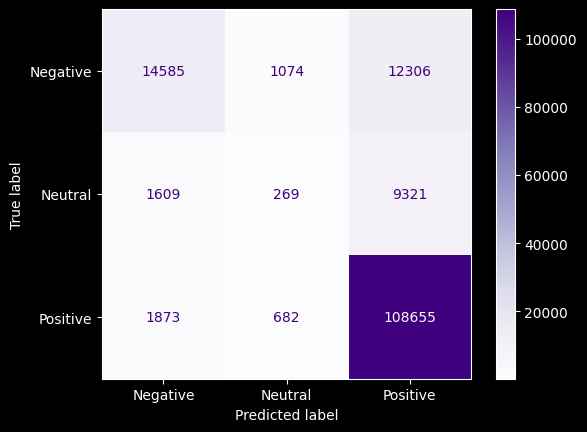

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['Negative', 'Neutral', 'Positive']

# Create confusion matrix
cm = confusion_matrix(df['true_label'], df['vader_sentiment'], labels=labels)

# Plot confusion matrix
disp =ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= labels)

disp.plot(cmap='Purples')
plt.title('')
plt.show()

### **Naive Bayes**

In [34]:
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Vectorize text
def vectorize_text(text_data):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(text_data)

    return X, vectorizer

# Create binary target based on star rating 
def prepare_target_variable(stars, threshold=4):

    return stars >= threshold

# Classifier model
def train_naive_bayes(X_train, y_train):
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)

    return nb_classifier

# Evaluate model
def evaluate_model_nb(model, X_test, y_test):
    test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_pred)

    return accuracy, test_pred


In [37]:
# Vectorize Text
X , vectorizer = vectorize_text(text_data=df['lemmas'])
y = df['true_label']

# Split the dataset into train and test
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
nb_classifier = train_naive_bayes(X_train, y_train)
accuracy, test_pred = evaluate_model_nb(nb_classifier, X_test, y_test)

print(f'Naive Bayes Accuracy with TF-IDF (Multi-Class): {accuracy:.2f}')

Naive Bayes Accuracy with TF-IDF (Multi-Class): 0.81


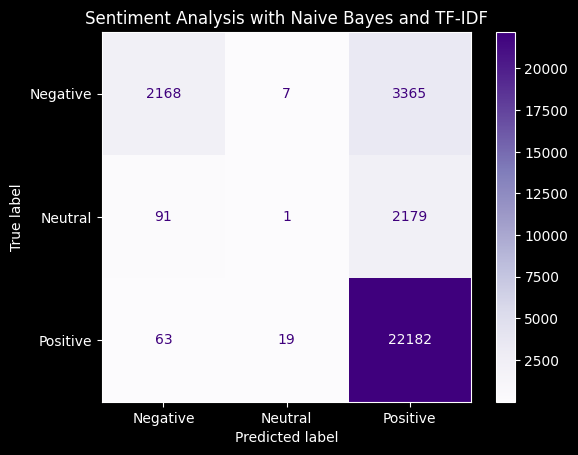

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification report
report = classification_report(y_test, test_pred, labels=labels)

# Confusion matrix
cm = confusion_matrix(y_test, test_pred, labels=labels)

# Plot confusion matrix
disp =ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= labels)

disp.plot(cmap='Purples')
plt.title('Sentiment Analysis with Naive Bayes and TF-IDF')
plt.show()
